# Introduction to statistics for Geoscientists

``` {index} Statistics: basics
```

*Statistics* is a study concerning the collection, organisation, analysis, interpretation and presentation of data. Statistics help with describing and analysing non-deterministic phenomena, i.e. ones that cannot be precisely predicted.

*Population* is a group/set of items/events of interest in the study.

A *sample* is a subset of population that we measure. Samples must be unbiased for reliable statistical analysis. Signor and Lipps (1982) for example showed that biased sampling in fossils can lead to wrong interpretations for extinctions due to discontinous fossil record in time and ranges of species in sediments.

*Distribution* is the shape of a histogram. The most commonly known distribution is a normal distribution ('bell curve'). A normal (Gaussian) distribution is very powerful as it approximates many real-world distributions. Mathematically, normal distribution is described as:

$$ f(x) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$

where $\sigma$ is the standard deviation and $\mu$ is the mean. It is often assumed that distributions will be normal in statistical methods. As an example, we can plot one using [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html).


In [1]:
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

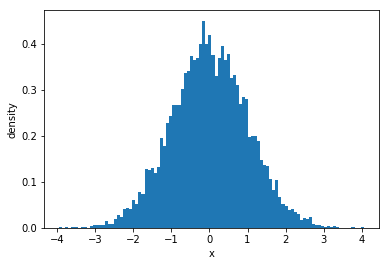

In [2]:
# Generate data with normal distribution
x = stats.norm.rvs(size=10000)

# Plot a histogram of the data
plt.hist(x, 100, density=1)

plt.xlabel("x")
plt.ylabel("density")

plt.show()

## Averages

_Average_ is a measure of central tendency, in colloquial language, it is a single number that represents a given population.

_Mean_ (arithmetic mean) is calculated by summing up all values and dividing by the population size.

_Median_ is the middle value for an ordered list of values.

_Mode_ is most common value.

Median and mean are commonly used as averages. Median may be a better representation for skewed distributions as it reduces the effect of outliers. Mode isn't really used that often.

We can calculate this with numpy and scipy.stats in-built functions:

In [3]:
# Generate data
x = np.array([1, 1, 1, 2, 5, 3, 4, 9, 7, 7, 3])

print("Mean = %.2f." % np.mean(x))
print("Median = %.2f." % np.median(x))
mode, count = stats.mode(x)
print("Mode = %.2f." % mode)

Mean = 3.91.
Median = 3.00.
Mode = 1.00.


### Measures of spread
Knowing populations by their means and medians can be misleading. Therefore, we can use spread with numpy function

    np.ptp()
    
to test samples.

In [4]:
sample1 = np.array([-0.2, -0.1, -0.1, 0.0, 0.0, 0.0 , 0.1 , 0.1 , 0.2])
sample2 = np.array([-2000, -1000, 0, 1000, 2000])

print ("Sample 1 mean = %.2f, median = %.2f, spread = %.2f."
       % (np.mean(sample1), np.median(sample1), np.ptp(sample1)))

print ("Sample 2 mean = %.2f, median = %.2f, spread = %.2f."
       % (np.mean(sample2), np.median(sample2),np.ptp(sample2)))

Sample 1 mean = 0.00, median = 0.00, spread = 0.40.
Sample 2 mean = 0.00, median = 0.00, spread = 4000.00.


## Percentiles
The nth percentile says that n% of the population are lower than given value.

The four percentiles with their own names are:
* 25th percentile - first quartile (Q1)
* 50th percentile - second quartile (Q2)
* 75th percentile - third quartile (Q3)
* Interquartile - range between Q1 and Q2.

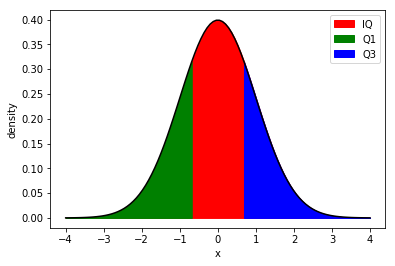

In [5]:
# Generate normal distribution
mu, std = 0, 1
xmin, xmax = [-4, 4]
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)

plt.plot(x, p, 'k')

# Fill background
plt.fill_between(x, 0, p, interpolate=True,
                color="red", label="IQ")

# Fill between values that are less than 25th percentile
plt.fill_between(x, 0, p, interpolate=True,
                 where=(x<=stats.norm.ppf(0.25)),
                color="green", label="Q1")

# Fill between values that are more than 75th percentile
plt.fill_between(x, 0, p, interpolate=True,
                 where=(x>=stats.norm.ppf(0.75)),
                color="blue", label="Q3")
plt.legend(loc="best")

plt.xlabel("x")
plt.ylabel("density")

plt.show()

## Variance and standard deviation
_Variance_ and _standard deviation_ are measures of spread. The sample variance is described as follows:

$$ v = \frac{1}{N-1} \sum_{i=1}^{N} \left( x_i - \bar{x}\right)^2 ,$$

where $N$ is the number of measurements, $x_i$ is the individual measurement and $\bar{x}$ is the sample mean. For population variance we can use $\frac{1}{N}$, instead of $\frac{1}{N-1}$. This corrects for bias in the estimation (Bessel's correction).

The sample standard deviations is:

$$\sigma=\sqrt{v},$$

which is useful as it is in units of the measured samples.

## Bivariant statistics

_Bivariant statistics_ is when we analyse two variables to look for relationships.

For example, let's load isotope data from ODP 806 site in Java, downloaded from [NOAA](https://www1.ncdc.noaa.gov/pub/data/paleo/contributions_by_author/berger1996/806isotp.txt) for a G.sacculifer foraminifera species.

In [6]:
import pandas as pd

odp_data = pd.read_csv('data/odp_806_data.csv')

odp_data.head()

,depth_1,depth_2,age,oxygen,carbon
0,0.1,0.09,3.42,1.98,2.09
1,0.2,0.19,6.94,1.86,1.93
2,0.3,0.28,10.61,1.68,1.60
3,0.4,0.38,14.63,1.48,1.91
4,0.5,0.47,18.90,0.85,1.92


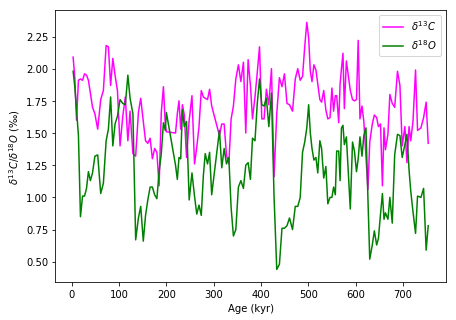

In [7]:
plt.figure(figsize=(7,5))

plt.plot(odp_data.age, odp_data.carbon, label="$\delta^{13}C$",
        c="magenta")
plt.plot(odp_data.age, odp_data.oxygen, label="$\delta^{18}O$",
        c="green")

plt.ylabel("$\delta^{13}C$/$\delta^{18}O$ (‰)")
plt.xlabel("Age (kyr)")

plt.legend(loc="best")
plt.show()

We can see that throughout past 800,000 years the oxygen isotope data and carbon isotope data is correlated. Let's plot them against each other:

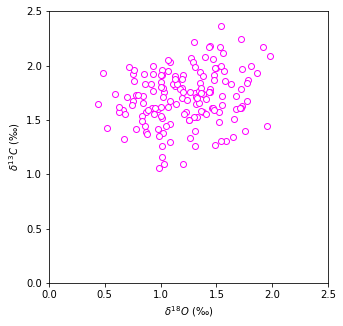

In [8]:
plt.figure(figsize=(5,5))

plt.scatter(odp_data.oxygen, odp_data.carbon, label="$\delta^{13}C$",
           c="white", edgecolor="magenta")

plt.ylabel("$\delta^{13}C$ (‰)")
plt.xlabel("$\delta^{18}O$ (‰)")

plt.xlim(0,2.5)
plt.ylim(0,2.5)

plt.show()

The data is quite scattered but the general trend is that with increased carbon isotope content we observe increased oxygen content. Linear regression can help to mathematically find, whether these to are correlated at all.

### Linear regression
Linear regression can help us determine whether there is relationship between two parameters. Most commonly used technique to fit a line into data is least squares regression that minimises the sum of squares of vertical errors. In Python, we can use:

    scipy.stats.linregress(x, y)

that returns slope $m$ and intercept $c$ for line equation $y=mx+c$. It also returns correlation coefficient _rvalue_, two-sided _p-value_ for hypothesis if slope is zero and _stderrr_, the standard error of estimated gradient. The meaning _p-value_ is explained more in section on Inferential Statistics.

#### Correlation coefficients

The correlation coefficient can be used to determine how well two samples are correlated.

| r-value |      Interpretation          |
|---------|------------------------------|
| -1      | Perfect negative correlation |
| -0.7    | Strong negative correlation  |
| -0.5    | Moderate negative correlation|
| -0.3    | Weak negative correlation    |
| 0       | No correlation               |
| 0.3     | Weak correlation             |
| 0.5     | Moderate correlation         |
| 0.7     | Strong correlation           |
| 1       | Perfect correlation          |

Scipy has a range of correlation coefficients. Most common is **Pearson r-value**:

    scipy.stats.pearsonr(x, y)
    
This coefficient is calculated according to:

$$ r = \frac{\sum (x-m_x)(y-m_y)}{\sqrt{\sum (x-m_x)^2 \sum (y-m_y)^2}},$$

where $m_x$ and $m_y$ are mean values for $x$ and $y$ vectors. You can read more about it [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html#scipy.stats.pearsonr).

Pearson correlation coefficient assumes that two datasets are **normally distributed**. That is not always the case, therefore, **Spearman's rank correlation coefficient** can be used for _non-parametric_ correlation (assuming no specific distribution). You can call it using:

    scipy.stats.spearmanr(x, y)


#### Exercise
Let's fit a line into the oxygen and carbon isotope data and find how well these two correlate:

In [9]:
# Create x values for line plotting
x = np.linspace(np.min(odp_data.oxygen), np.max(odp_data.oxygen), 100)

# Fit a line
slope, intercept, r_value, p_value, stderr = stats.linregress(odp_data.oxygen, odp_data.carbon)

print("Slope = %.2f." % slope)
print("Intercept = %.2f." % intercept)
print("Correlation coefficient = %.2f." % r_value)
print("P-value = %.2f." % p_value)
print("Standard error = %.2f." % stderr)

pearson_r, pearson_p = stats.pearsonr(odp_data.oxygen, odp_data.carbon)
spearman_r, spearman_p = stats.spearmanr(odp_data.oxygen, odp_data.carbon)

print("Pearson r = %.2f." % pearson_r)
print("Spearman r = %.2f." % spearman_r)

Slope = 0.15.
Intercept = 1.52.
Correlation coefficient = 0.21.
P-value = 0.01.
Standard error = 0.06.
Pearson r = 0.21.
Spearman r = 0.20.


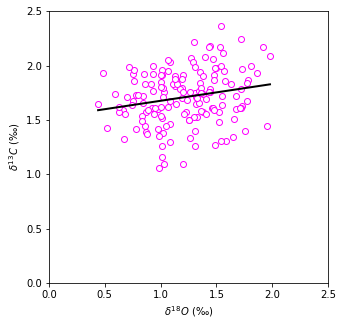

In [10]:
# Create a plot
plt.figure(figsize=(5,5))

plt.scatter(odp_data.oxygen, odp_data.carbon, label="$\delta^{13}C$",
           c="white", edgecolor="magenta")

plt.plot(x, slope*x+intercept, color="black", lw=2)

plt.ylabel("$\delta^{13}C$ (‰)")
plt.xlabel("$\delta^{18}O$ (‰)")

plt.xlim(0,2.5)
plt.ylim(0,2.5)

plt.show()

As expected, our data is quite scattered and correlation coefficient is $< 0.3$, meaning there is very weak correlation. Let's generate some random data and fit a line:

In [11]:
# Create random data
np.random.seed(20202020)
x = np.random.random(50)
y = -2*x + np.random.random(50)

# Create equally space data for fitted line
xx = np.linspace(np.min(x), np.max(x), 100)

# Fit a line
slope, intercept, r_value, p_value, stderr = stats.linregress(x, y)

print("Slope = %.2f." % slope)
print("Intercept = %.2f." % intercept)
print("Correlation coefficient = %.2f." % r_value)
print("P-value = %.2f." % p_value)
print("Standard error = %.2f." % stderr)

pearson_r, pearson_p = stats.pearsonr(x, y)
spearman_r, spearman_p = stats.spearmanr(x, y)

print("Pearson r = %.2f." % pearson_r)
print("Spearman r = %.2f." % spearman_r)

Slope = -2.10.
Intercept = 0.58.
Correlation coefficient = -0.89.
P-value = 0.00.
Standard error = 0.16.
Pearson r = -0.89.
Spearman r = -0.88.


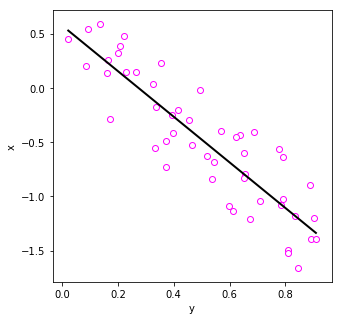

In [12]:
# Create a plot
plt.figure(figsize=(5,5))

plt.scatter(x, y, label="$\delta^{13}C$",
           c="white", edgecolor="magenta")

plt.plot(xx, slope*xx+intercept, color="black", lw=2)

plt.ylabel("x")
plt.xlabel("y")

plt.show()

This time data shows strong negative correlation.

## Inferential statistics

_Inferential statistics_ aims to infer properties of data based on hypotheses testing. Hypotheses will test probability. 

*Probability* $p$ describes how likely an event is to occur. It ranges between $(0,1)$, where $p=0$ implies that event will never occur and $p=1$ means that the event will always occur.

### Hypotheses
We can formulate two hypotheses - the _null hypothesis_ (H0) and an _alternative hypothesis_ (H1). We will only accept H1, if it is very unlikely for H0 to explain our results.

For example, we have grain sizes for samples A and B, where sample A has higher mean:
* H0 - There is no difference in mean grain size between A and B.
* H1 - Mean grain size is higher in sample A than B.

### Student's T-test

Different test types are available. For example, we can use Student's T-test to check the probability for two samples to have the same underlying mean. Scipy provides:

    scipy.stats.ttest_ind(a, b)

This test will return _t-statistic_ which describes how the means are different from one another and _p-value_, the probability of null hypothesis being true.

We can use this test on some randomly generated data with normal distributions.

In [13]:
# Generate data that will have the same mean
a = stats.norm.rvs(size=100000, random_state=12345)
b = stats.norm.rvs(size=100000, random_state=67890)

# Use Student's T-test
t_statistic, p_value = stats.ttest_ind(a, b)
print ("t-statistic = %.2f." % t_statistic)
print ("p-value = %.2f." % p_value)

t-statistic = 0.77.
p-value = 0.44.


If observed p-value is $>0.05$ or $0.10$, we cannot reject the null hypothesis. The threshold is arbitrary, $p = 0.05$ is just most commonly used.

T-test is commonly used but it is not always appropriate to use:
* Assumes normally distributed samples
* Needs a large sample size to give sensible results


### Tails
Instead of testing how different the means are, we could test whether the mean of A is greater than the mean of B. For that we can use _one-tailed_ test.

Alternatively, we can take a two-tailed test to find whether mean of A is higher or lower than mean of B. 

When using scipy.stats tests, make sure you check whether it is a one-tailed or two-tailed test!

### Non-parametric tests

Tests that don't require data to be normally distributed are for example, the [Mann-Whitney](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html#scipy.stats.mannwhitneyu) rank test and 
[Kolmogorow-Smirnov test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html#scipy.stats.mannwhitneyu) for goodness of fit. Two-sample K-S test can be used as an alternative to the t-test. It answers the question whether samples come from the same underlying population.

### Testing for normal distribution

We can test data with hypotheses:
* H0 - underlying distribution is normal
* H1 - underlying distibution is not normal

Scipy provides:
    
    scipy.stats.normaltest()
It tests the null hypothesis if a sample comes from a normal distribution. We can test earthquake depth and magnitude data from New Zealand whether they come from normal distribution:

In [14]:
nz_eqs = pd.read_csv("data/nz_largest_eq_since_1970.csv")
nz_eqs.head()

,year,month,day,utc_time,mag,lat,lon,depth_km,region,iris_id,timestamp
0,2009,7,15,09:22:31,7.8,-45.8339,166.6363,20.9,"OFF W. COAST OF S. ISLAND, N.Z.",2871698,1247649751
1,2016,11,13,11:02:59,7.8,-42.7245,173.0647,22.0,"SOUTH ISLAND, NEW ZEALAND",5197722,1479034979
2,2003,8,21,12:12:47,7.2,-45.0875,167.0892,6.8,"SOUTH ISLAND, NEW ZEALAND",1628007,1061467967
3,2001,8,21,06:52:06,7.1,-36.8010,-179.7230,33.5,"EAST OF NORTH ISLAND, N.Z.",1169374,998376726
4,2004,11,22,20:26:23,7.1,-46.4964,164.8273,7.6,"OFF W. COAST OF S. ISLAND, N.Z.",1888053,1101155183


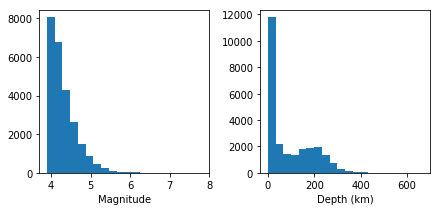

In [15]:
fig, axes = plt.subplots(1,2, figsize=(7,3))

ax1 = axes[0]
ax1.hist(nz_eqs.mag,bins=20)
ax1.set_xlabel("Magnitude")

ax2 = axes[1]
ax2.hist(nz_eqs.depth_km,bins=20)
ax2.set_xlabel("Depth (km)")

plt.subplots_adjust(wspace=0.3)
plt.show()

The distributions do not look normal, however, we can test them to get a more robust evidence:

In [16]:
statistic, p_value = stats.normaltest(nz_eqs.mag)

print("P-value = %.9f." % p_value)

statistic, p_value = stats.normaltest(nz_eqs.depth_km)
print("P-value = %.9f." % p_value)

P-value = 0.000000000.
P-value = 0.000000000.


In both cases, the p-value is so small, the null hypothesis is rejected, and therefore, the distributions are not normal.

## Chi-squared test ( or $\chi^2$ test)

Chi-squared test is used for discrete (categorised data). For example, discrete data may be rock type (granite, sandstone, limestone, etc.) or fault type (normal, strike-slip, etc.). 

This test assesses how likely it is that counts of discrete data fit some expected pattern. In Python we can use a [chi-squared test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html) with:

    scipy.stats.chisquare()

that tests the null hypothesis that the categorical data has the given frequency. It returns _s-statistic_ that is the value of Chi-squared and _p-value_ which is the two-tailed probability of the result occuring by chance.

### Exercise

Let's say that we analyse 2000 grades and they fall into fail, 2rd, 2ii, 2i and 1st categories. We find that the marks breakdown is

Fail: 3.2% 3rd: 11.5% 2ii: 15.9% 2i: 41.3% 1st: 28.1

We will consider now a group of students and their marks:

| Grade | Group 1 | Group 2 |
|-------|---------|---------|
| Fail  | 1       | 0       |
| 3rd   | 12      | 8       |
| 2ii   | 23      | 8       |
| 2i    | 29      | 24      |
| 1st   | 21      | 40      |

Chi-squared test will help us determine whether these grades are atypical.

In [17]:
observed1 = np.array([1, 12, 23, 29, 21])
observed2 = np.array([0, 8, 8, 24, 40])

predicted = np.array([3.2, 11.5, 15.9, 41.3, 28.1])

s_statistic, p_value = stats.chisquare(observed1, predicted)
print("Group 1 p-value = %.5f." % p_value)

s_statistic, p_value = stats.chisquare(observed2, predicted)
print("Group 2 p-value = %.5f." % p_value)

Group 1 p-value = 0.03779.
Group 2 p-value = 0.00040.


The p-value indicates that these groups have quite typical mark distribtion.